# Randon Pairing vs Power Pairing e Page Rank vs Trivial Rank
Neste documento, queremos investigar qual é o melhor jeito de fazer o rankeamento e o pairing, para o Campeonato Fluminense de Debates.

O objetivo é que os 8 melhores debatedores passem de fase com a menor variância para o 8º colocado. Também objetivamos que cada debate (sala) seja mais equilibrado quanto o possível. Talvez algunas destes requisitos entrem em conflito entre si.

In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import random
%matplotlib inline

In [147]:
duplas = 16
rodadas = 4
teste = 10000

In [18]:
power = [random.random() for i in range(duplas)]
power.sort(reverse=True)

## Paring aleatório e trivial rank

In [148]:
def campeonato_aleatorio_padrao(power, rodadas): #Trivial Rank, Random Pairing
    global Avar
    duplas = len(power)
    tabela = [[0,0] for i in range(duplas)]
    def gerar_rodada_aleatoria(duplas): 
        numeros = list(range(duplas))
        random.shuffle(numeros)
        rodada = [[]]
        while len(numeros) != 0:
            if len(rodada[-1]) != 4:
                rodada[-1].append(numeros.pop())
            else:
                rodada.append([])
        return rodada
    for i in range(rodadas):
        rodada = gerar_rodada_aleatoria(duplas)
        for sala in rodada:
            A = [(power[dupla]+0.05*np.random.randn(), dupla) for dupla in sala]
            azinho = [i[0] for i in A]
            Avar += np.var(azinho)
            A.sort(key = lambda x: x[1])
            tabela[A[0][1]][0] += 3
            tabela[A[0][1]][1] += A[0][0]
            tabela[A[1][1]][0] += 2
            tabela[A[1][1]][1] += A[1][0]
            tabela[A[2][1]][0] += 1
            tabela[A[2][1]][1] += A[2][0]
            tabela[A[3][1]][1] += A[3][0]
    return tabela

In [149]:
A = [[] for i in range(duplas)]
Avar = 0 #variância das partidas
for i in range(teste):
    tabela = campeonato_aleatorio_padrao(power, rodadas) #executa um campeonato e gera a tabela
    tabela1 = [(tabela[i][0], tabela[i][1], i) for i in range(len(tabela))] #ordena
    tabela1.sort(key=lambda x: (x[0], x[1]), reverse=True)
    tabela2 = tabela[:]
    tabela2.sort(key=lambda x: (x[0], x[1]), reverse=True)
    n = 0
    for item in tabela1:
        A[item[2]].append(n)
        n += 1
Avar/(teste*duplas) #Variância média das salas. Mede o quanto que neste modelo de campeonato o nível das duplas é díspar.

0.05650426001089521

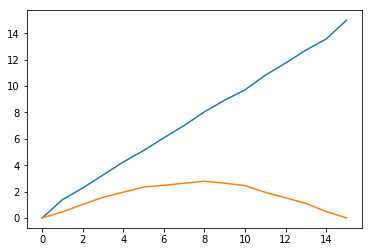

In [150]:
a = [(sum(item)/len(item), np.var(item)) for item in A]
plt.plot(a)
plt.show()

A variância é maior justamente no meio, onde menos gostaríamos que houvesse variância.

In [151]:
varianciatotal = [i[1] for i in a]
sum(varianciatotal) #variância total do campeonato

25.35312298

In [152]:
(np.var(A[7]))**0.5 #desvio padrão do 8º colocado

1.6222111329910174

## Power paring, trivial ranking
### Caso 1: Primeira rodada aleatória, demais por power paring.

In [153]:
def campeonato_power_paired_rank_padrao(power, rodadas):
    global Bvar
    duplas = len(power)
    tabela = [[0,0] for i in range(duplas)]
    def gerar_rodada_power_paired(duplas, tabela): 
        if sum([sum(x) for x in tabela])== 0:
            numeros = list(range(duplas))
            random.shuffle(numeros)
            rodada = [[]]
            while len(numeros) != 0:
                if len(rodada[-1]) != 4:
                    rodada[-1].append(numeros.pop())
                else:
                    rodada.append([])
            return rodada
        else:
            tabela1 = [(tabela[i][0], tabela[i][1], i) for i in range(duplas)]
            tabela1.sort(key=lambda x: (x[0], x[1]), reverse=True)
            numeros = [i[2] for i in tabela1]
            rodada = [[]] 
            while len(numeros) != 0:
                if len(rodada[-1]) != 4:
                    rodada[-1].append(numeros.pop())
                else:
                    rodada.append([])
            return rodada
    for i in range(rodadas):
        rodada = gerar_rodada_power_paired(duplas, tabela)
        for sala in rodada:
            A = [(power[dupla]+0.05*np.random.randn(), dupla) for dupla in sala]
            azinho = [i[0] for i in A]
            Bvar += np.var(azinho)
            A.sort(key = lambda x: x[1])
            tabela[A[0][1]][0] += 3
            tabela[A[0][1]][1] += A[0][0]
            tabela[A[1][1]][0] += 2
            tabela[A[1][1]][1] += A[1][0]
            tabela[A[2][1]][0] += 1
            tabela[A[2][1]][1] += A[2][0]
            tabela[A[3][1]][1] += A[3][0]
    return tabela

In [154]:
B = [[] for i in range(duplas)]
Bvar = 0
for i in range(teste):
    tabela = campeonato_power_paired_rank_padrao(power, rodadas) #executa um campeonato e gera a tabela
    tabela1 = [(tabela[i][0], tabela[i][1], i) for i in range(len(tabela))] #ordena
    tabela1.sort(key=lambda x: (x[0], x[1]), reverse=True)
    tabela2 = tabela[:]
    tabela2.sort(key=lambda x: (x[0], x[1]), reverse=True)
    n = 0
    for item in tabela1:
        B[item[2]].append(n)
        n += 1
Bvar/(teste*duplas) #mostra a variância média das partidas neste modelo de campeonato

0.0267226504851434

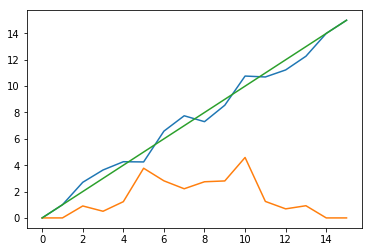

In [155]:
b = [(sum(item)/len(item), np.var(item), B.index(item)) for item in B]
plt.plot(b)
plt.show()

É interessante que a variância seja menor justamente no break e mesmo havendo algumas duplas que não ficam no seu lugar de fato na maioria das vezes, é pouco importante porque acontece justamente longe do break.

In [156]:
varianciatotal = [i[1] for i in b]
sum(varianciatotal) #Desvio padrão médio total

24.44103788

In [157]:
(np.var(B[7]))**0.5 #Desvio padrão do 8º colocado

1.4874303983716346

Aqui a variância total do campeonato é menor que no outro caso.

# Campeonato Comum + Pairing por reputação

In [192]:
def campeonato_power_paired_rank_padrao(power, rodadas):
    global Dvar
    duplas = len(power)
    tabela = [[0,0] for i in range(duplas)]
    def gerar_rodada_power_paired(duplas, tabela): 
        if sum([sum(x) for x in tabela])== 0:
            tabela1 = [(tabela[i][0], (0.1*np.random.randn()+power[i]), i) for i in range(duplas)]
            tabela1.sort(key=lambda x: (x[0], x[1]), reverse=True)
            numeros0 = []
            while len(numeros0) < 0.25*len(tabela1):
                a = tabela1.pop(0)
                numeros0.append(a[2])
            numeros = [i[2] for i in tabela1]
            random.shuffle(numeros)
            rodada = [[]] 
            while len(numeros) != 0:
                if len(rodada[-1]) == 0:
                    rodada[-1].append(numeros0.pop())
                elif len(rodada[-1]) != 4:
                    rodada[-1].append(numeros.pop())
                else:
                    rodada.append([])
            return rodada
        else:
            tabela1 = [(tabela[i][0], tabela[i][1], i) for i in range(duplas)]
            tabela1.sort(key=lambda x: (x[0], x[1]), reverse=True)
            numeros = [i[2] for i in tabela1]
            rodada = [[]] 
            while len(numeros) != 0:
                if len(rodada[-1]) != 4:
                    rodada[-1].append(numeros.pop())
                else:
                    rodada.append([])
            return rodada
    for i in range(rodadas):
        rodada = gerar_rodada_power_paired(duplas, tabela)
        for sala in rodada:
            A = [(power[dupla]+0.05*np.random.randn(), dupla) for dupla in sala]
            A.sort(key = lambda x: x[1])
            azinho = [i[0] for i in A]
            Dvar += np.var(azinho)
            tabela[A[0][1]][0] += 3
            tabela[A[0][1]][1] += A[0][0]
            tabela[A[1][1]][0] += 2
            tabela[A[1][1]][1] += A[1][0]
            tabela[A[2][1]][0] += 1
            tabela[A[2][1]][1] += A[2][0]
            tabela[A[3][1]][1] += A[3][0]
    return tabela

In [193]:
campeonato_power_paired_rank_padrao(power, rodadas)

[[12, 3.7990071946001573],
 [9, 3.1569610780893327],
 [8, 3.3299261697449687],
 [7, 3.0854000395157746],
 [7, 2.8691627123844565],
 [6, 2.6250049375222586],
 [7, 2.2193621200978186],
 [6, 1.9289481979268601],
 [6, 1.5286358544417102],
 [5, 1.4176188716707396],
 [6, 1.5115066023841428],
 [5, 1.0908358640662894],
 [5, 1.0444254821835395],
 [4, 0.9643789060949685],
 [3, 0.8645230695340096],
 [0, 0.07290117256654079]]

In [194]:
D = [[] for i in range(duplas)]
Dvar = 0
for i in range(teste):
    tabela = campeonato_power_paired_rank_padrao(power, rodadas) #executa um campeonato e gera a tabela
    tabela1 = [(tabela[i][0], tabela[i][1], i) for i in range(len(tabela))] #ordena
    tabela1.sort(key=lambda x: (x[0], x[1]), reverse=True)
    tabela2 = tabela[:]
    tabela2.sort(key=lambda x: (x[0], x[1]), reverse=True)
    n = 0
    for item in tabela1:
        D[item[2]].append(n)
        n += 1
Dvar/(teste*duplas) #mostra a variância média das partidas neste modelo de campeonato

KeyboardInterrupt: 

In [161]:
varianciatotal = [i[1] for i in d]
sum(varianciatotal) #Desvio padrão médio total

18.827114160000004

In [162]:
(np.var(D[7]))**0.5 #Desvio padrão do 8º colocado

0.9382425912310739

O que é relevante neste último teste é que **estimar os melhores debatedores** ajuda a diminuir o desvio padrão médio em quase 3 colocações e o desvio padrão do 8º colocado é diminuido em $16\%$. Isso é muito relevante e será capaz de que o campeonato tenha semi-finais com os melhores debatedores.

In [196]:
def campeonato_page_rank_paired(power, rodadas):
    global Evar
    duplas = len(power)
    tabela = [[0,0] for i in range(duplas)]
    def gerar_rodada_power_paired(duplas, tabela): 
        if sum([sum(x) for x in tabela])== 0:
            tabela1 = [(tabela[i][0], (0.1*np.random.randn()+power[i]), i) for i in range(duplas)]
            tabela1.sort(key=lambda x: (x[0], x[1]), reverse=True)
            numeros0 = []
            while len(numeros0) <= 0.25*len(tabela1):
                a = tabela1.pop(0)
                numeros0.append(a[2])
            numeros = [i[2] for i in tabela1]
            random.shuffle(numeros)
            rodada = [[]] 
            while len(numeros) != 0:
                if len(rodada[-1]) == 0:
                    rodada[-1].append(numeros0.pop())
                elif len(rodada[-1]) != 4:
                    rodada[-1].append(numeros.pop())
                else:
                    rodada.append([])
            return rodada
        else:
            tabela1 = [(tabela[i][0], tabela[i][1], i) for i in range(duplas)]
            tabela1.sort(key=lambda x: (x[0], x[1]), reverse=True)
            numeros = [i[2] for i in tabela1]
            rodada = [[]] 
            while len(numeros) != 0:
                if len(rodada[-1]) != 4:
                    rodada[-1].append(numeros.pop())
                else:
                    rodada.append([])
            return rodada
    ADJ = np.zeros(duplas*duplas)
    ADJ = ADJ.reshape(duplas, duplas)
    for i in range(rodadas):
        rodada = gerar_rodada_power_paired(duplas, tabela)
        for sala in rodada:
            A = [(power[dupla]+0.05*np.random.randn(), dupla) for dupla in sala]
            A.sort(key = lambda x: x[1])
            azinho = [i[0] for i in A]
            ADJ[A[0][1], A[1][1]] += 1
            ADJ[A[0][1], A[2][1]] += 1
            ADJ[A[0][1], A[3][1]] += 1
            ADJ[A[1][1], A[2][1]] += 1
            ADJ[A[1][1], A[3][1]] += 1
            ADJ[A[2][1], A[3][1]] += 1
            Evar += np.var(azinho)
            tabela[A[0][1]][0] += 3
            tabela[A[0][1]][1] += A[0][0]
            tabela[A[1][1]][0] += 2
            tabela[A[1][1]][1] += A[1][0]
            tabela[A[2][1]][0] += 1
            tabela[A[2][1]][1] += A[2][0]
            tabela[A[3][1]][1] += A[3][0]
    G = nx.from_numpy_matrix(ADJ, parallel_edges=True, create_using=nx.DiGraph())
    PR = nx.pagerank(G, alpha=0.9)
    tabelosa = [PR[duplas - i - 1] for i in range(duplas)]
    return tabelosa

In [197]:
E = [[] for i in range(duplas)]
Evar = 0
for i in range(teste):
    tabela = campeonato_page_rank_paired(power, rodadas) #executa um campeonato e gera a tabela
    tabela1 = [(tabela[i], i) for i in range(len(tabela))] #ordena
    tabela1.sort(reverse=True)
    n = 0
    for item in tabela1:
        E[item[1]].append(n)
        n += 1
Evar/(teste*duplas) #mostra a variância média das partidas neste modelo de campeonato

0.026749555332823235

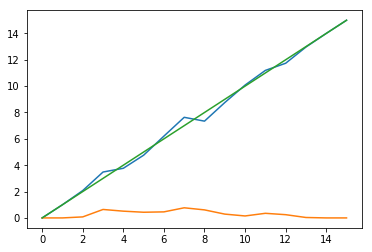

In [198]:
e = [(sum(item)/len(item), np.var(item), E.index(item)) for item in E]
plt.plot(e)
plt.show()

In [199]:
varianciatotal = [i[1] for i in e]
sum(varianciatotal) #Desvio padrão médio total

4.5625275400000005

In [200]:
(np.var(E[7]))**0.5 #Desvio padrão do 8º colocado

0.8764493767468833